# ДЗ 1. Иерархический кластерный анализ

Данные описывают экономические условия в 48 городах мира в 1991 году.
Данные были собраны отделом экономических исследований банка Union
(Швейцария). Описаны экономические условия в 48 городах мира в 1991 году.  
Число наблюдений: 48
Названия переменных:  
City (Город): Название города  
Работа (Work): Взвешенное среднее числа рабочих часов, сосчитанное по 12 профессиям     
Цена (Price): Индекс цен 112 товаров и услуг, включая арендную плату за жилье(значение для Цюриха взято за 100%)    
Заработная плата (Salary): Индекс заработной платы за час работы, сосчитанный по 12 профессиям после налогов и вычетов (значение для Цюриха
взято за 100%)

In [263]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

In [264]:
df = pd.read_csv("Econom_Cities_data.csv", sep=";", index_col='City')
df.tail(10)

,Work,Price,Salary
City,,,
Seoul,1842,"58,3","32,7"
Singpore,2042,"64,4","16,1"
Stockholm,1805,"111,3","39,2"
Sydney,1668,"70,8","52,1"
Taipei,2145,"84,3","34,5"
Tel_Aviv,2015,"67,3",27
Tokyo,1880,115,68
Toronto,1888,"70,2","58,2"
Vienna,1780,78,"51,3"


Необходимо заменить запятые на точки для численных операций. 

In [265]:
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].str.replace(',', '.').astype(float)
df.head(50)


,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


В данной задаче необходима стандартизация, т.к. у признаков разные еденицы измерения.   
Приведем рабочие часы к относительному индексу (значение для Цюриха
взято за 100%)

In [266]:
df['Work'] = round(df['Work']/df.loc['Zurich', 'Work'] *100, 1)
df.tail()

,Work,Price,Salary
City,,,
Tel_Aviv,107.9,67.3,27.0
Tokyo,100.6,115.0,68.0
Toronto,101.1,70.2,58.2
Vienna,95.3,78.0,51.3
Zurich,100.0,100.0,100.0


??????????????????/

In [267]:
df = df.drop(['Cairo', 'Jakarta'])

In [268]:
#  Активируем 3 процедуры иерархического кластерного анализа
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster    # для построения дендрограмм, для кластерного анализа, 
                                                                     # для распределения объектов по найденным 
                                                                     # кластерам (дополнительная колонка с принадлежностью) 

Для проведения иерархического кластерного анализа  <br>
используем команду linkage из библиотеки scipy. 

Три аргумента этой команды: <br>
таблица данных,  <br>
способ вычисления расстояний между кластерами (```ward```, ```single```(default), ```complete```, ```average```, ```weighted```, ```centroid```, ```median```, ```weighted```)  <br>
и способ вычисления расстояний между объектами (```euclidean``` (default), ```cityblock```, ```hamming```, ```cosine```).   <br>
См. [документацию]( https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).


In [269]:
#  Кластеризуем
link = linkage(df, 'ward', 'euclidean')

В объекте ```link```  хранится история объединения кластеров. Это матрица numpy ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- объем нового кластера.

Строим дендрограммы для определения кол-ва кластеров. 

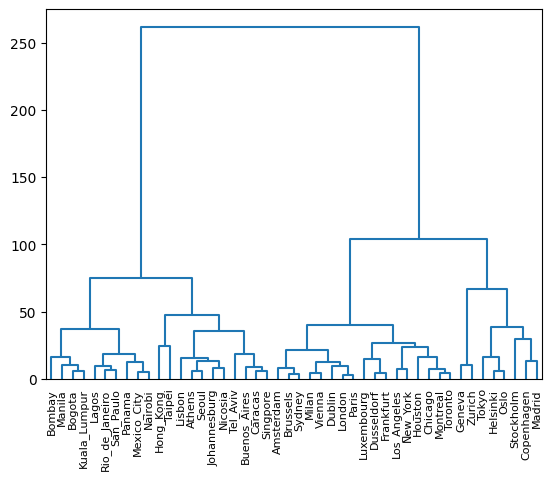

In [270]:
dn = dendrogram(link, color_threshold = -1, labels=df.index.tolist())


Логично остановиться на 6 или 4. Лучше 4 кластера, чтобы не было совсем маленьких кластеров (из 2-ух городов)

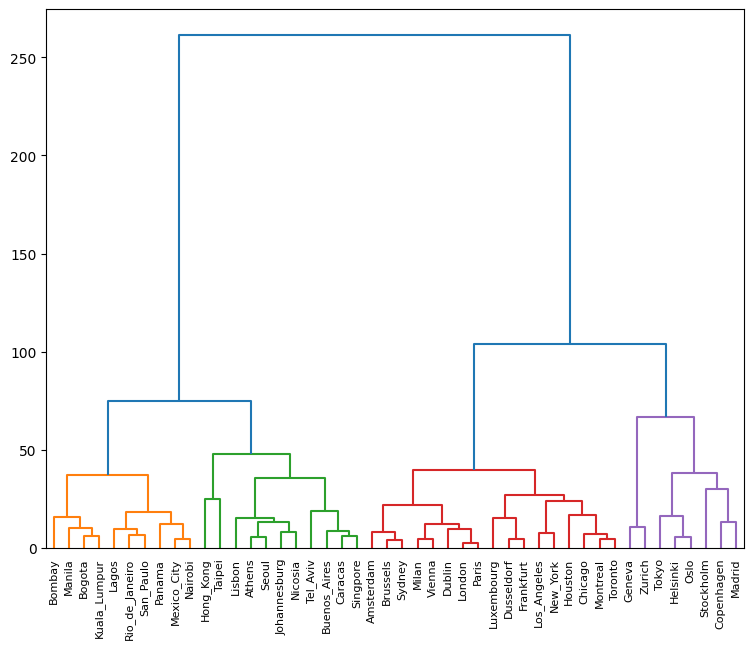

In [271]:
fig = plt.figure(figsize=(9,7))
dn = dendrogram(link, color_threshold = 70, labels=df.index.tolist())

Добавим к таблице данных df столбец ```cluster```, содержащий код того кластера, в который попал объект. Это сделаем с помощью команды ```fcluster```. <br>
Первый аргумент команды это объект ```link```, содержащий результаты кластеризации.  <br>
Третий аргумент ```criterion``` указывает, как разбивать на кластеры (```distance```, если остановка объединений по расстоянию между кластерами или ```maxclust```, если будет заданно число кластеров).  <br>
Вторым  аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от значения аргумента ```criterion```.

In [272]:
# Информация о кластерах добавляется в таблицу данных в виде столбца

# Останавливаем объединение, когда расстояние между кластерами превысит 40
# df['cluster'] = fcluster(link, 40, criterion='distance')


# Останавливаем объединение, когда останется 4 кластера
df['cluster'] = fcluster(link, 4, criterion='maxclust')

df.head()

,Work,Price,Salary,cluster
City,,,,
Amsterdam,91.8,65.6,49.0,3
Athens,95.9,53.8,30.4,2
Bogota,115.2,37.9,11.5,1
Bombay,109.9,30.3,5.3,1
Brussels,91.4,73.8,50.5,3


### Интерпретация

Сравним типичные объекты в разных кластерах.
Посмотрим, по каким переменным различаются кластеры.

Для этого сгруппируем данные по номеру кластера, а затем в каждой группе вычислим средние значения каждой характеристики. <br>
Используем стандартную конструкцию: вызов метода ```groupby``` с последующим применением функции к группам.

In [273]:
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,107.120000,43.610000,8.030000
2,105.772727,60.381818,23.909091
3,96.429412,75.758824,55.005882
4,94.387500,104.550000,67.587500


Получили следующие группы:   
????

Посчитаем, сколько наблюдений попало в каждый кластер. 


In [274]:
#  2 вариант. Другой способ - сколько раз встретилось значение?
print(df['cluster'].value_counts())

cluster
3    17
2    11
1    10
4     8
Name: count, dtype: int64


Дисбаланс в третьем кластере????

In [275]:
#  Какие наблюдения попали в 3-й кластер?
df[df['cluster']==3].index.values


array(['Amsterdam', 'Brussels', 'Chicago', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'Houston', 'London', 'Los_Angeles', 'Luxembourg',
       'Milan', 'Montreal', 'New_York', 'Paris', 'Sydney', 'Toronto',
       'Vienna'], dtype=object)

Рассмотрим случай деления на 5, а не на 4 кластера.   
???

In [276]:
df.groupby(fcluster(link, 5, criterion='maxclust')).mean()

,Work,Price,Salary,cluster
1,107.120000,43.610000,8.030000,1.0
2,105.772727,60.381818,23.909091,2.0
3,96.429412,75.758824,55.005882,3.0
4,100.300000,97.950000,95.150000,4.0
5,92.416667,106.750000,58.400000,4.0


**Каменистая осыпь, она же локоть**

График, помогающий определить число кластеров. Особенно полезен, если данных много. 
Будем использовать второй столбец матрицы ```link``` где  хранятся расстояния между объединяемыми кластерами. 

In [277]:
dist = link[:, 2]
dist

array([  2.64764046,   3.99624824,   4.48998886,   4.55521679,
         4.6184413 ,   4.85180379,   5.68066897,   5.72974694,
         5.87877538,   6.21288983,   6.38435588,   7.3237058 ,
         7.58287544,   8.34805367,   8.34925146,   8.86942313,
         9.67694855,   9.81019877,  10.26450194,  10.54798559,
        12.30745032,  12.36004315,  13.0678996 ,  13.14610208,
        15.15794621,  15.28836159,  16.04633915,  16.10993482,
        16.61876449,  18.31402013,  18.87930966,  21.69449239,
        23.8652467 ,  24.82800838,  27.07048413,  29.95852689,
        35.42379771,  37.37740405,  38.47068148,  39.84234331,
        47.91471696,  66.86141139,  74.88276633, 103.85766238,
       261.52536091])

На графике "Каменистая осыпь" показывается зависимость расстояний между кластерами от шага объединения (обратного). На графике находим момент, начиная с которого расстояние перестанет значительно меняться.

Text(0, 0.5, 'Расстояние')

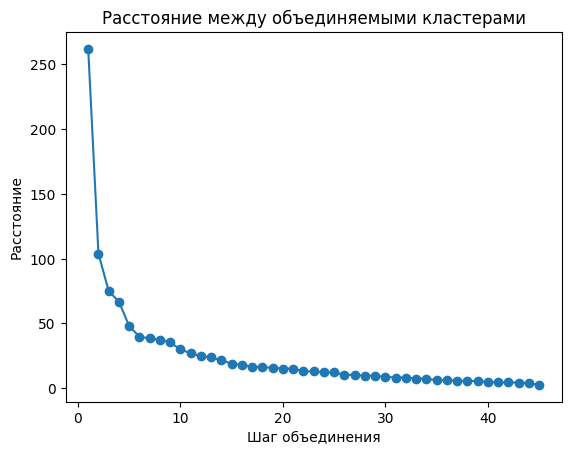

In [278]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Из картинки видно, что если мы остановим объединение кластеров при расстоянии равном примерно 2.5, мы получим 4 кластера, а при равном 3.1 -- 3 кластера.

В случае больших данных график стоит модифицировать. Рекомендуется показывать на графике не все слияния, а только несколько последних. 

Чтобы автоматизировать процесс, факт сильного изменения расстояний между кластерами можно фиксировать с помощью "производной": там где график выходит на горизонталь, "производная" станет почти нулём.

Пример 2. Кластеризация претендентов.
----------------------

In [279]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/2_pretendent")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/2_pretendent'

In [ ]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [ ]:
# удаляю столбцы, которые не нужны для кластеризации

# В столбце NR находится номер объекта, 
# столбец неинформативен, удаляем 
del df['NR']

Вопрос для самопроверки.

Нужно ли стандартизовать данные?

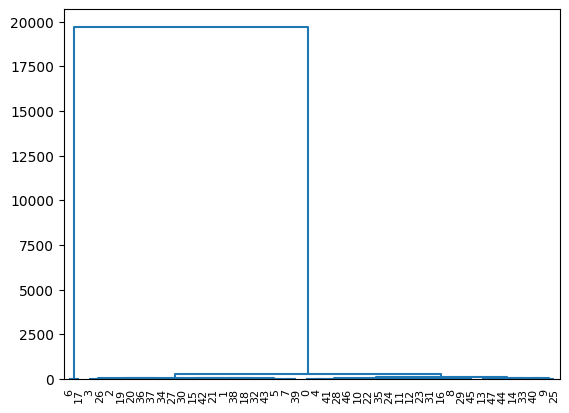

In [ ]:
# строю дендрограмму

link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link, color_threshold = -1)

Вывод: число кластеров равно 4.  <br>
Переходим к интерпретации кластеров

In [ ]:
#  Добавляем столбец cluster к таблице данных
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [ ]:
#  Средние значения баллов в каждом кластере
df.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


Пример 3. Потребление протеинов в Европе.
------------------

In [ ]:
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_02_cluster/3_Protein Consumption in Europe")


In [ ]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


Вопрос для самопроверки.

Нужно ли стандартизовать данные?

Стандартизация данных
--------------------
В этом примере данные измерены в одной шкале, в одних и тех же единицах, но значения в разных столбцах различаются почти на два порядка.

Вывод: данные надо стандартизировать. 

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:
* StandardScaler -- приведение к нулевому среднему и единичной дисперсии.
* MinMaxScaler -- приведение данных к отрезку [0, 1].
* MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание. У этих методов есть методы-аналоги ```scale```, ```minmax_scale``` и ```maxabs_scale```, которые делают практически то же самое, но в задачах распознавания, которые встретяся позже, удобнее использовать именно рассматриваемый вариант.

Процесс стандартизации выглядит так:

In [ ]:
from sklearn import preprocessing

# Выбираем один из вариантов стандартизации

stand_1 = preprocessing.StandardScaler()
# stand_1 = preprocessing.MaxAbsScaler()
# stand_1 = preprocessing.MinMaxScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_1.fit(df)
# преобразуем данные
X = stand_1.transform(df)
# Получаем объект X -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [ ]:
#  Все хорошо?
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


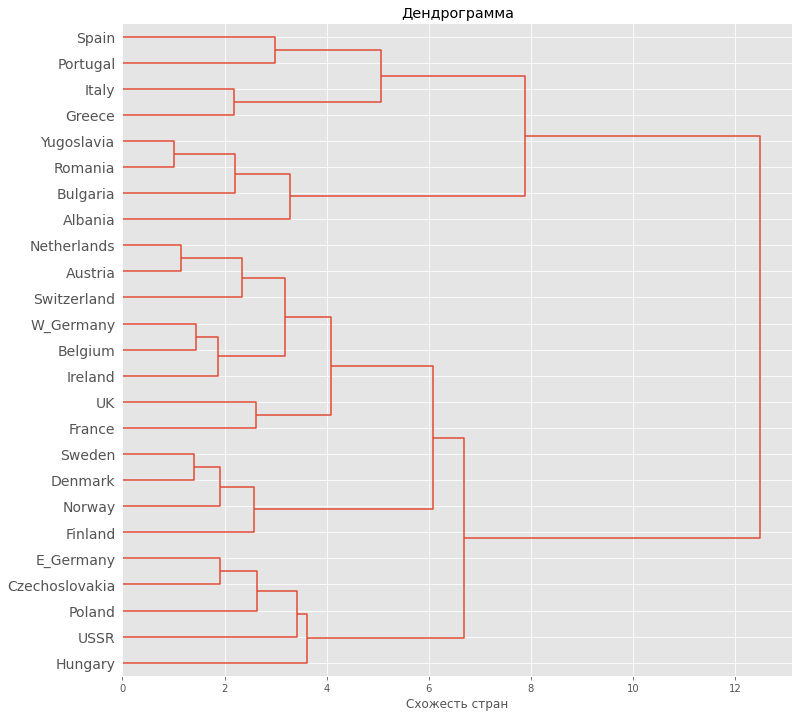

In [ ]:
#  кластерный анализ

link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                leaf_font_size = 14, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                color_threshold=-1,
                # повернуть подписи вертикально
                orientation = "right",
                leaf_rotation=0.)

#   plt.savefig('dendro_3ex.png', dpi=300, facecolor = 'white')

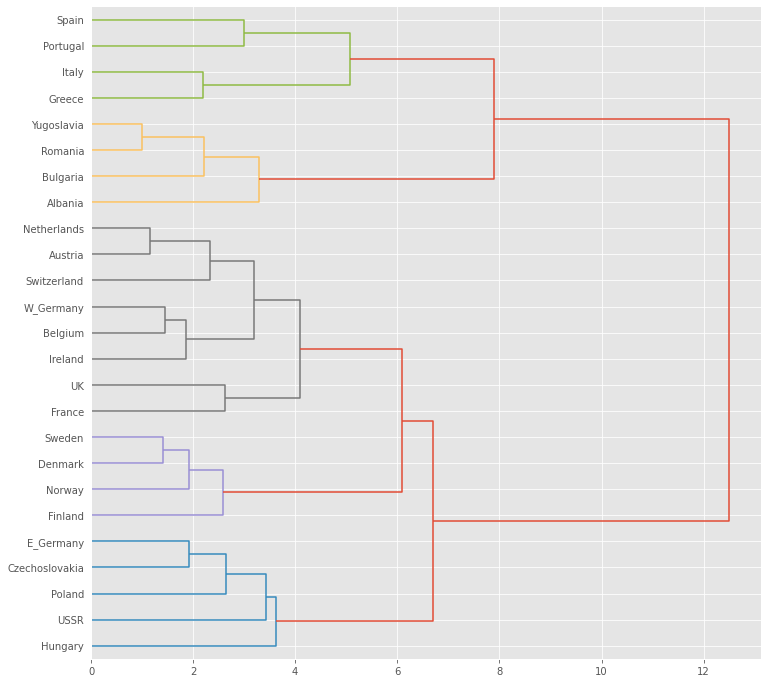

In [ ]:
#  Кластеризуем и строим дендрограмму

link = linkage(X, 'ward', 'euclidean')

fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                orientation = "right",
                leaf_rotation=0.)

Обратите внимание, как подписывать имена объектов

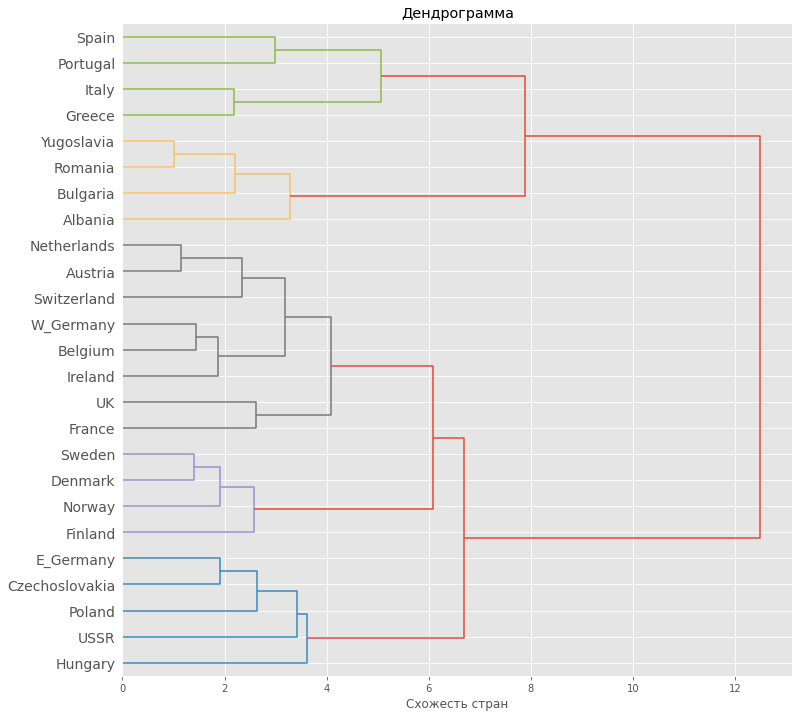

In [ ]:
#  Изменим размер подписей объектов

link = linkage(X, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                leaf_font_size = 14, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                orientation = "right",
                leaf_rotation=0.)

In [ ]:
df['cluster'] = fcluster(link, 5.5, criterion='distance')

In [ ]:
df.groupby('cluster').mean()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.560,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.550,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.650,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.950,5.0500,2.975
5,8.1250,3.8000,2.4750,11.2000,7.625,33.675,3.975,5.6750,7.075


In [ ]:
#  Какие страны попали в 5-й кластер?
df[df['cluster']==5].index.values

array(['Greece', 'Italy', 'Portugal', 'Spain'], dtype=object)

In [ ]:
#  Какие страны попали в 4-й кластер?
df[df['cluster']==4].index.values

array(['Albania', 'Bulgaria', 'Romania', 'Yugoslavia'], dtype=object)

In [ ]:
#  Надоело, выводим состав кластеров сразу для всей выборки
df['cluster'].sort_values()

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster, dtype: int32

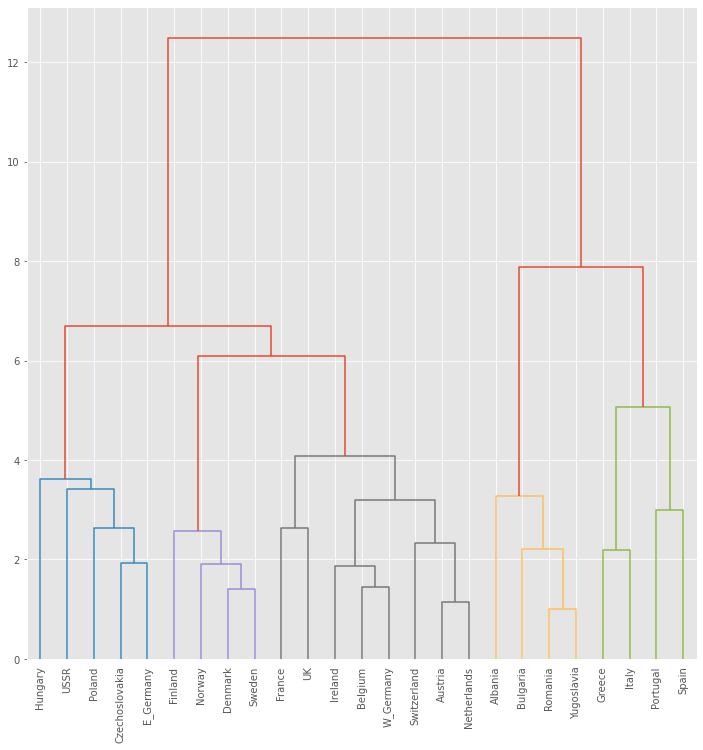

In [ ]:
#   Можно, конечно строить дендрограмму и так...

fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для сокращения слишком ветввистой дендрограммы
                # сейчас не работает, так как по умолчанию  p=30
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=5.5,
                leaf_rotation=90.)

In [ ]:
# from sklearn import preprocessing

# Выбираем один из вариантов стандартизации

# stand_1 = preprocessing.StandardScaler()
stand_2 = preprocessing.MaxAbsScaler()
# stand_1 = preprocessing.MinMaxScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand_2.fit(df)
# преобразуем данные
X_2 = stand_2.transform(df)
# Получаем объект X_2 -- матрицу класса numpy.ndarray.
# Преобразуем её в объект класса pandas.DataFrame.
X_2 = pd.DataFrame(X_2, index=df.index, columns=df.columns)


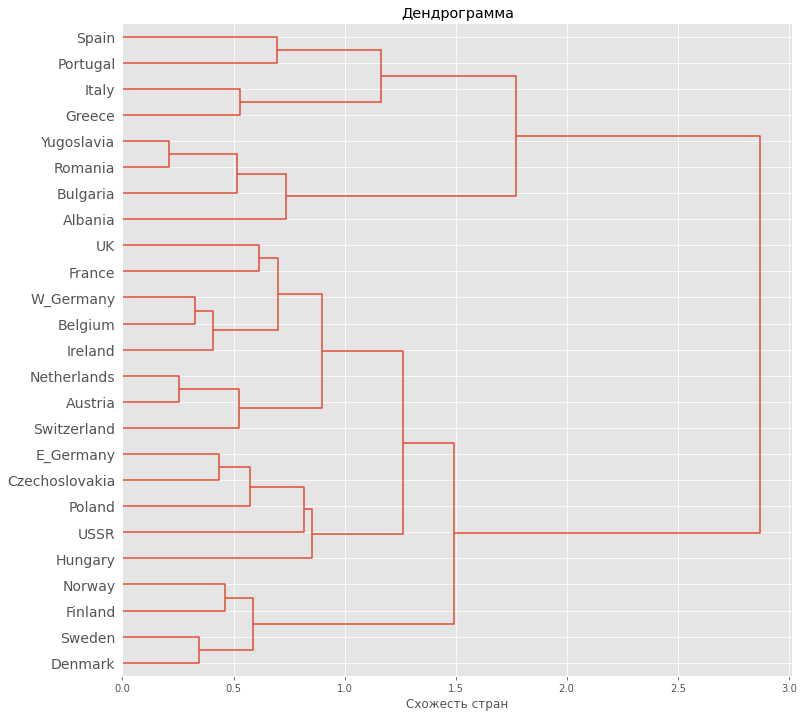

In [ ]:
#  кластерный анализ

link_2 = linkage(X_2, 'ward', 'euclidean')
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(111)
ax1.set_xlabel('Схожесть стран')

ax1.set_title('Дендрограмма')

dn = dendrogram(link_2,
                # массив с названиями объектов для подписи по оси X
                labels=X_2.index.tolist(),
                leaf_font_size = 14, 
                # опция для красивого отображения слишком ветвистой дендрограммы
                truncate_mode='lastp',
                color_threshold=-1,
                # повернуть подписи вертикально
                orientation = "right",
                leaf_rotation=0.)


In [ ]:
df['cluster'] = fcluster(link, 5.5, criterion='distance')

In [ ]:
df['cluster_2'] = fcluster(link_2, 1.2, criterion='distance')

In [ ]:
df['cluster'].sort_values()

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster, dtype: int32

In [ ]:
df['cluster_2'].sort_values()

Country
Sweden            1
Norway            1
Denmark           1
Finland           1
Poland            2
USSR              2
Czechoslovakia    2
E_Germany         2
Hungary           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Portugal          5
Greece            5
Spain             5
Italy             5
Name: cluster_2, dtype: int32

####  Удалено из курса

In [ ]:
#  Напоминание: выбор столбца таблицы в Pandas

#  print(df["COKE"])

In [ ]:
#  Напоминание: выбор элемента таблицы в Pandas

df["D_PEPSI"][3]

0

Text(22, 2.6, '4 кластера')

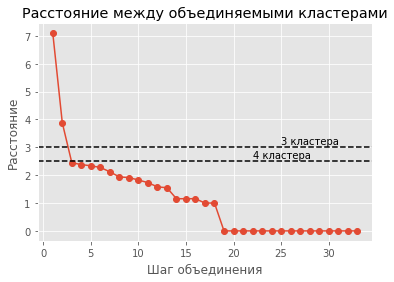

In [ ]:
#  Добавляем уровни, на которых останавливаем объединение

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 кластера')
plt.text(22, 2.6, '4 кластера')